In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heat_Stroke_Dataset.csv to Heat_Stroke_Dataset.csv


In [ ]:
#pip install --upgrade numpy scipy pandas

In [ ]:
# Load the dataset
df=pd.read_csv('Heat_Stroke_Dataset.csv')
df.head(10)

,Daily Ingested Water (L),Time of year (month),Cardiovascular disease history,Dehydration,Heat Index (HI),Diastolic BP,Environmental temperature (C),Sickle Cell Trait (SCT),Systolic BP,Weight (kg),...,Heart / Pulse rate (b/min),Age,Sweating,"Skin color (flushed/normal=1, pale=0.5, cyatonic=0)",Strenuous exercise,Nationality,Sex,Hot/dry skin,Time of day,Heat stroke
0,2.821588,7.000000,0,0,107.296910,20.000000,39.00000,0,60.000000,48.364079,...,166.00000,38.0,0,0.021014,0.5,1,1,0,10.550628,1
1,5.000000,6.841842,0,0,105.410610,90.000000,37.70000,0,120.000000,52.413863,...,68.00000,50.0,1,0.045987,0.0,1,0,0,10.613669,1
2,5.000000,4.636197,0,0,101.823065,50.000000,37.70000,0,100.000000,46.344503,...,96.00000,64.0,0,0.031299,0.0,1,0,0,14.419615,1
3,10.500000,2.589828,0,0,95.925389,78.000000,37.70000,0,116.000000,42.132476,...,70.00000,19.0,0,0.052654,0.0,1,0,0,9.467515,1
4,5.000000,9.914389,0,0,101.673016,88.000000,37.70000,0,130.000000,41.856694,...,88.00000,21.0,1,0.076099,0.0,1,0,0,12.460315,1
5,1.500000,11.957716,0,0,101.153176,74.000000,37.70000,0,107.000000,53.116208,...,88.00000,52.0,0,0.034125,0.0,1,0,0,13.974692,1
6,8.500000,2.299879,0,0,122.749205,76.000000,37.70000,0,116.000000,45.415118,...,76.00000,45.0,0,0.027279,0.0,1,0,0,11.906263,1
7,5.000000,9.379589,0,0,106.282326,116.000000,37.70000,0,140.000000,47.572998,...,85.00000,23.0,1,0.006342,0.0,1,1,0,9.206840,1
8,4.142434,7.000000,0,0,110.000000,86.058568,34.26006,0,119.726545,151.953000,...,110.69734,27.0,1,0.053541,1.0,1,1,0,10.972176,1
9,5.000000,8.615348,0,0,103.446002,44.000000,26.10000,1,126.000000,45.518011,...,168.00000,12.0,1,0.001781,1.0,1,1,0,17.000000,1


In [ ]:
# target variable column is named 'Heat Stroke'
target_variable = 'Heat stroke'

# Check the data type of the target variable
print(f"Data type of the target variable: {df[target_variable].dtype}")

# Check the unique values in the target variable
print(f"Unique values in the target variable: {df[target_variable].unique()}")


Data type of the target variable: int64
Unique values in the target variable: [1 0]


In [ ]:
# Define shape
df.shape

(609, 27)

In [ ]:
#cheking data type of each variable
df.dtypes

,0
Daily Ingested Water (L),float64
Time of year (month),float64
Cardiovascular disease history,int64
Dehydration,int64
Heat Index (HI),float64
Diastolic BP,float64
Environmental temperature (C),float64
Sickle Cell Trait (SCT),int64
Systolic BP,float64
Weight (kg),float64


In [ ]:
# Dropping the columns which are not useful for our evalutation
df1=df.drop(['Time of year (month)','Exertional (1) vs classic (0)','Barometric Pressure', 'Nationality'], axis=1)
df1

,Daily Ingested Water (L),Cardiovascular disease history,Dehydration,Heat Index (HI),Diastolic BP,Environmental temperature (C),Sickle Cell Trait (SCT),Systolic BP,Weight (kg),Patient temperature,...,BMI,Heart / Pulse rate (b/min),Age,Sweating,"Skin color (flushed/normal=1, pale=0.5, cyatonic=0)",Strenuous exercise,Sex,Hot/dry skin,Time of day,Heat stroke
0,2.821588,0,0,107.296910,20.000000,39.000000,0,60.000000,48.364079,40.800000,...,24.000000,166.000000,38.000000,0,0.021014,0.500000,1,0,10.550628,1
1,5.000000,0,0,105.410610,90.000000,37.700000,0,120.000000,52.413863,38.492691,...,19.624603,68.000000,50.000000,1,0.045987,0.000000,0,0,10.613669,1
2,5.000000,0,0,101.823065,50.000000,37.700000,0,100.000000,46.344503,39.755061,...,21.124059,96.000000,64.000000,0,0.031299,0.000000,0,0,14.419615,1
3,10.500000,0,0,95.925389,78.000000,37.700000,0,116.000000,42.132476,39.277247,...,20.752915,70.000000,19.000000,0,0.052654,0.000000,0,0,9.467515,1
4,5.000000,0,0,101.673016,88.000000,37.700000,0,130.000000,41.856694,39.432559,...,22.048364,88.000000,21.000000,1,0.076099,0.000000,0,0,12.460315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2.625332,0,0,69.444843,82.705255,28.276056,0,117.025213,45.173841,36.825856,...,19.510813,106.868166,28.952569,1,0.060595,0.038827,1,0,16.994422,0
605,1.069333,0,0,67.273039,83.822981,26.008688,0,116.654793,53.125129,37.257788,...,18.940945,93.713145,52.733157,1,0.031162,0.657076,1,0,12.034963,0
606,1.085594,0,0,53.017902,85.101995,32.863125,0,112.713272,47.898687,36.354708,...,19.156116,143.858902,21.496651,0,0.015298,0.260901,0,0,16.545827,0
607,5.916055,0,0,78.665639,88.765944,22.353665,0,111.962413,52.487889,34.332384,...,21.062199,181.952819,26.420689,0,0.050419,0.305553,0,0,16.757862,0


In [ ]:
#Checking for missing values
if df1.isnull().values.any():
    df1
else:
    print("No missing values in the dataset")

No missing values in the dataset


In [ ]:
#Deleting the rows with incorrect values values in 'Diastolic BP' column
df2 = df1[df1['Diastolic BP'] >0]
df2

,Daily Ingested Water (L),Cardiovascular disease history,Dehydration,Heat Index (HI),Diastolic BP,Environmental temperature (C),Sickle Cell Trait (SCT),Systolic BP,Weight (kg),Patient temperature,...,BMI,Heart / Pulse rate (b/min),Age,Sweating,"Skin color (flushed/normal=1, pale=0.5, cyatonic=0)",Strenuous exercise,Sex,Hot/dry skin,Time of day,Heat stroke
0,2.821588,0,0,107.296910,20.000000,39.000000,0,60.000000,48.364079,40.800000,...,24.000000,166.000000,38.000000,0,0.021014,0.500000,1,0,10.550628,1
1,5.000000,0,0,105.410610,90.000000,37.700000,0,120.000000,52.413863,38.492691,...,19.624603,68.000000,50.000000,1,0.045987,0.000000,0,0,10.613669,1
2,5.000000,0,0,101.823065,50.000000,37.700000,0,100.000000,46.344503,39.755061,...,21.124059,96.000000,64.000000,0,0.031299,0.000000,0,0,14.419615,1
3,10.500000,0,0,95.925389,78.000000,37.700000,0,116.000000,42.132476,39.277247,...,20.752915,70.000000,19.000000,0,0.052654,0.000000,0,0,9.467515,1
4,5.000000,0,0,101.673016,88.000000,37.700000,0,130.000000,41.856694,39.432559,...,22.048364,88.000000,21.000000,1,0.076099,0.000000,0,0,12.460315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2.625332,0,0,69.444843,82.705255,28.276056,0,117.025213,45.173841,36.825856,...,19.510813,106.868166,28.952569,1,0.060595,0.038827,1,0,16.994422,0
605,1.069333,0,0,67.273039,83.822981,26.008688,0,116.654793,53.125129,37.257788,...,18.940945,93.713145,52.733157,1,0.031162,0.657076,1,0,12.034963,0
606,1.085594,0,0,53.017902,85.101995,32.863125,0,112.713272,47.898687,36.354708,...,19.156116,143.858902,21.496651,0,0.015298,0.260901,0,0,16.545827,0
607,5.916055,0,0,78.665639,88.765944,22.353665,0,111.962413,52.487889,34.332384,...,21.062199,181.952819,26.420689,0,0.050419,0.305553,0,0,16.757862,0


In [ ]:
#Deleting the rows with incorrect values values in 'Diastolic BP' column
df_new = df2[df2['Systolic BP'] >0]
df_new

,Daily Ingested Water (L),Cardiovascular disease history,Dehydration,Heat Index (HI),Diastolic BP,Environmental temperature (C),Sickle Cell Trait (SCT),Systolic BP,Weight (kg),Patient temperature,...,BMI,Heart / Pulse rate (b/min),Age,Sweating,"Skin color (flushed/normal=1, pale=0.5, cyatonic=0)",Strenuous exercise,Sex,Hot/dry skin,Time of day,Heat stroke
0,2.821588,0,0,107.296910,20.000000,39.000000,0,60.000000,48.364079,40.800000,...,24.000000,166.000000,38.000000,0,0.021014,0.500000,1,0,10.550628,1
1,5.000000,0,0,105.410610,90.000000,37.700000,0,120.000000,52.413863,38.492691,...,19.624603,68.000000,50.000000,1,0.045987,0.000000,0,0,10.613669,1
2,5.000000,0,0,101.823065,50.000000,37.700000,0,100.000000,46.344503,39.755061,...,21.124059,96.000000,64.000000,0,0.031299,0.000000,0,0,14.419615,1
3,10.500000,0,0,95.925389,78.000000,37.700000,0,116.000000,42.132476,39.277247,...,20.752915,70.000000,19.000000,0,0.052654,0.000000,0,0,9.467515,1
4,5.000000,0,0,101.673016,88.000000,37.700000,0,130.000000,41.856694,39.432559,...,22.048364,88.000000,21.000000,1,0.076099,0.000000,0,0,12.460315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2.625332,0,0,69.444843,82.705255,28.276056,0,117.025213,45.173841,36.825856,...,19.510813,106.868166,28.952569,1,0.060595,0.038827,1,0,16.994422,0
605,1.069333,0,0,67.273039,83.822981,26.008688,0,116.654793,53.125129,37.257788,...,18.940945,93.713145,52.733157,1,0.031162,0.657076,1,0,12.034963,0
606,1.085594,0,0,53.017902,85.101995,32.863125,0,112.713272,47.898687,36.354708,...,19.156116,143.858902,21.496651,0,0.015298,0.260901,0,0,16.545827,0
607,5.916055,0,0,78.665639,88.765944,22.353665,0,111.962413,52.487889,34.332384,...,21.062199,181.952819,26.420689,0,0.050419,0.305553,0,0,16.757862,0


In [ ]:
df_new.shape

(603, 23)

In [ ]:
import pandas as pd
from IPython.display import display

# Calculate mean
mean = df_new.mean()

# Calculate median
median = df_new.median()

# Calculate mode (mode might return multiple values, so we take the first one)
mode = df_new.mode().iloc[0]

# Calculate standard deviation
std_dev = df_new.std()

# Combine all summary statistics into one DataFrame for easy viewing
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std_dev
})

# Display the summary statistics in a table format
display(summary_stats)


,Mean,Median,Mode,Standard Deviation
Daily Ingested Water (L),3.526034,3.502870,5.000000,1.440031
Cardiovascular disease history,0.048093,0.000000,0.000000,0.214140
Dehydration,0.001658,0.000000,0.000000,0.040723
Heat Index (HI),84.312328,83.412551,31.859605,16.236766
Diastolic BP,82.044130,84.252288,60.000000,10.676711
Environmental temperature (C),31.194318,31.053242,40.000000,5.671015
Sickle Cell Trait (SCT),0.003317,0.000000,0.000000,0.057543
Systolic BP,115.013402,114.764308,100.000000,13.258652
Weight (kg),47.739184,47.617615,41.279030,5.572017
Patient temperature,36.767843,36.399824,32.793188,1.931446


So from above we can deduce that mean and median are in similar range, so presence of outliers are not likely present or less.

Also there is variabilty in Std based on each column.
Small Standard Deviation: Data points are close to the mean, indicating less variability.
Large Standard Deviation: Data points are spread out over a wider range of values, indicating more variability

# Analyse the cleaned data set using PCA

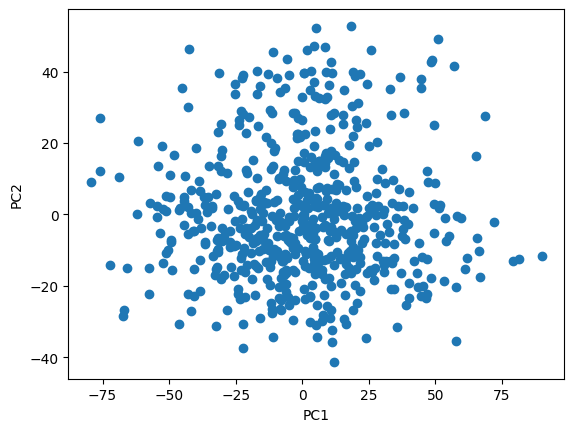

In [ ]:
#Performing PCA on raw data

from sklearn.decomposition import PCA

#Separate features and target variable
New_data= df_new.drop(columns=['Heat stroke'])

pca = PCA(n_components=22)
pca.fit(New_data)
t_pca = pca.transform(New_data)

#Scatter Plot
ax = plt.gca()
ax.scatter(t_pca[:,0], t_pca[:,1])
#ax.axis('scaled')
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

In [ ]:
pca.explained_variance_ratio_

array([4.79175240e-01, 2.08040916e-01, 1.34249892e-01, 1.03884441e-01,
       3.18579592e-02, 1.93757950e-02, 1.53579779e-02, 3.19077747e-03,
       1.65153955e-03, 1.26469098e-03, 9.60987296e-04, 5.72206216e-04,
       1.49039853e-04, 1.39098043e-04, 3.94301817e-05, 3.42483765e-05,
       2.76048564e-05, 1.20689142e-05, 6.97068584e-06, 6.24385224e-06,
       1.90297782e-06, 9.68745908e-07])

In [ ]:
pca.components_

array([[-2.92259273e-03, -2.33131795e-04,  3.92999282e-05,
        -3.29128300e-02, -2.65087603e-02,  1.32410270e-02,
         5.28312608e-05, -3.18655413e-02,  6.36201848e-04,
         1.60272808e-03,  2.19635169e-03,  1.10116884e-05,
         7.37965226e-05,  2.55300328e-03,  9.97955393e-01,
         3.28368367e-02, -1.62996174e-03,  2.00952702e-04,
         7.20398732e-05,  1.78997283e-04,  4.91932355e-04,
         2.04250027e-03],
       [ 1.07893705e-03, -1.20018020e-03,  2.61435101e-04,
         7.80357594e-01, -3.41591319e-01,  1.36939477e-01,
         7.28930316e-05, -6.71819750e-02,  7.98066925e-03,
         6.24007804e-02,  8.25599947e-02,  2.19327551e-03,
        -4.11874763e-03, -3.40679255e-03, -3.72211382e-03,
         4.90031347e-01, -5.77982912e-03,  3.00177936e-03,
        -6.58677110e-03,  6.41944234e-04,  4.28151125e-03,
         5.71641993e-03],
       [ 2.52379015e-03,  1.11234561e-05, -2.95285198e-04,
         4.07933277e-02,  4.13577780e-01,  3.17592297e-02,
    

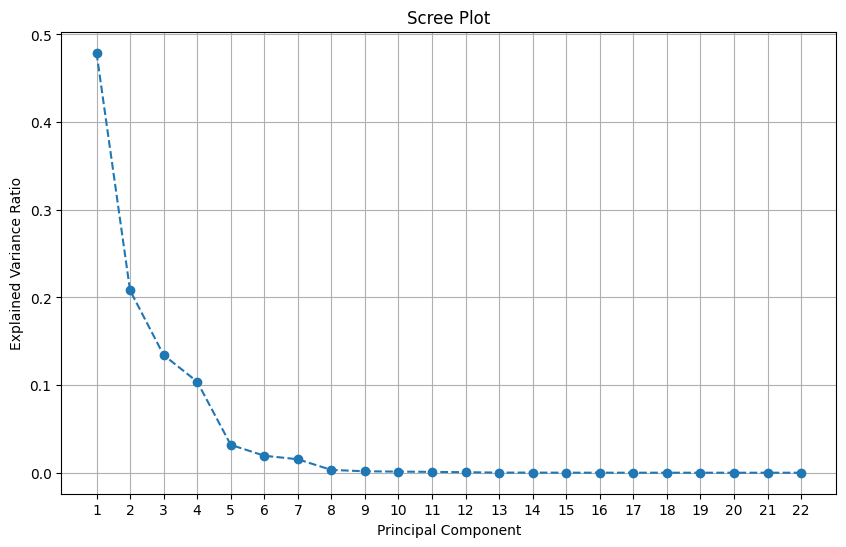

In [ ]:
#Scree Plot

# Step 1: Get the explained variance ratio
expl_var = pca.explained_variance_ratio_

# Step 2: Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(expl_var) + 1), expl_var, marker='o', linestyle='--')


# Step 3: Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(expl_var) + 1))  # Set x-ticks to match the number of components
plt.grid()

plt.show()

The above one is before normalization

In [ ]:
np.sum(pca.explained_variance_ratio_[:])

0.9999999999999998

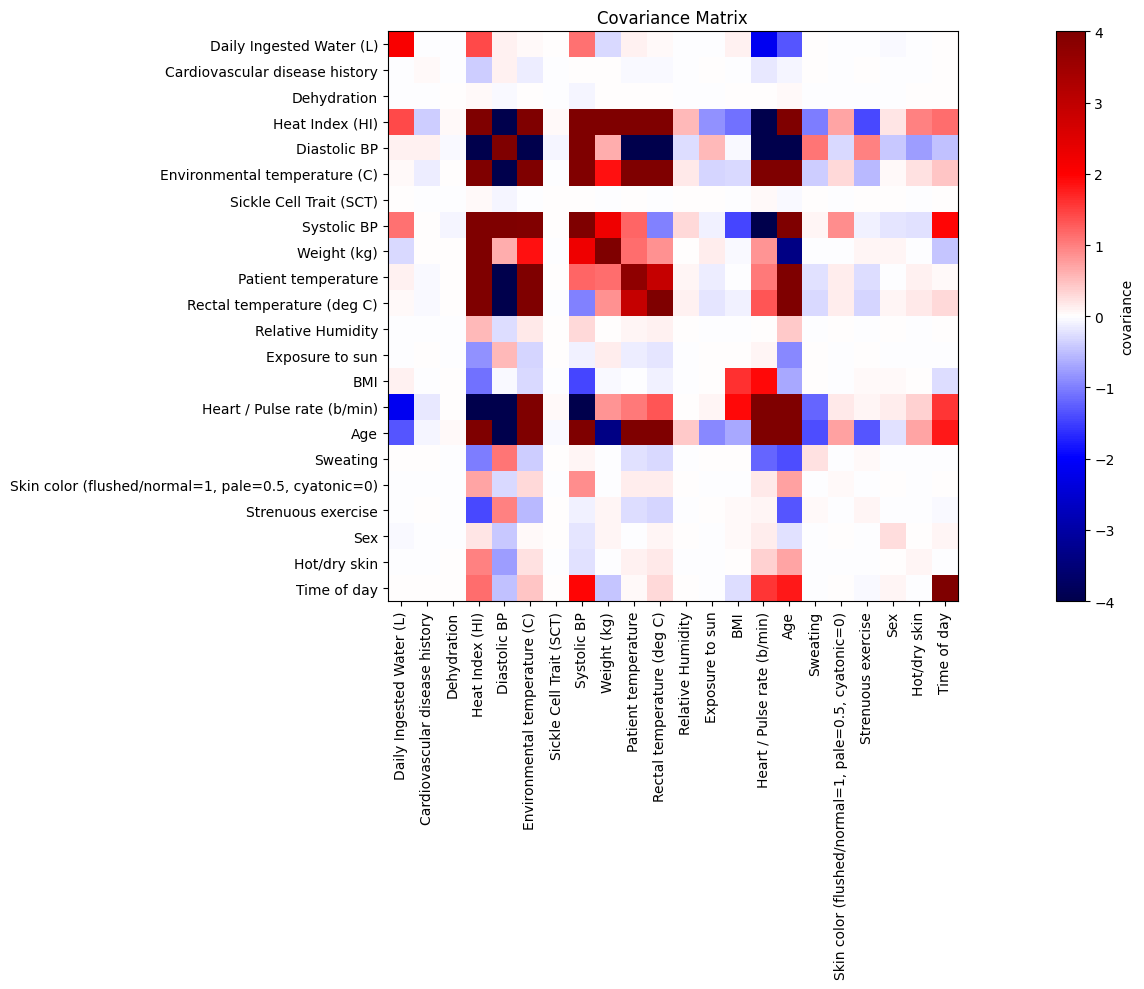

In [ ]:
#Covariance matrix
covmat = pca.get_covariance()

fig, ax = plt.subplots(figsize=(20, 10))
img = ax.imshow(covmat, cmap='seismic', vmin=-4, vmax=4)
plt.colorbar(img, ax=ax, label='covariance')

ax.set_yticks(range(len(New_data.columns)))
t = ax.set_yticklabels(New_data.columns)
ax.set_xticks(range(len(New_data.columns)))
t = ax.set_xticklabels(New_data.columns, rotation=90)

plt.title('Covariance Matrix')
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()

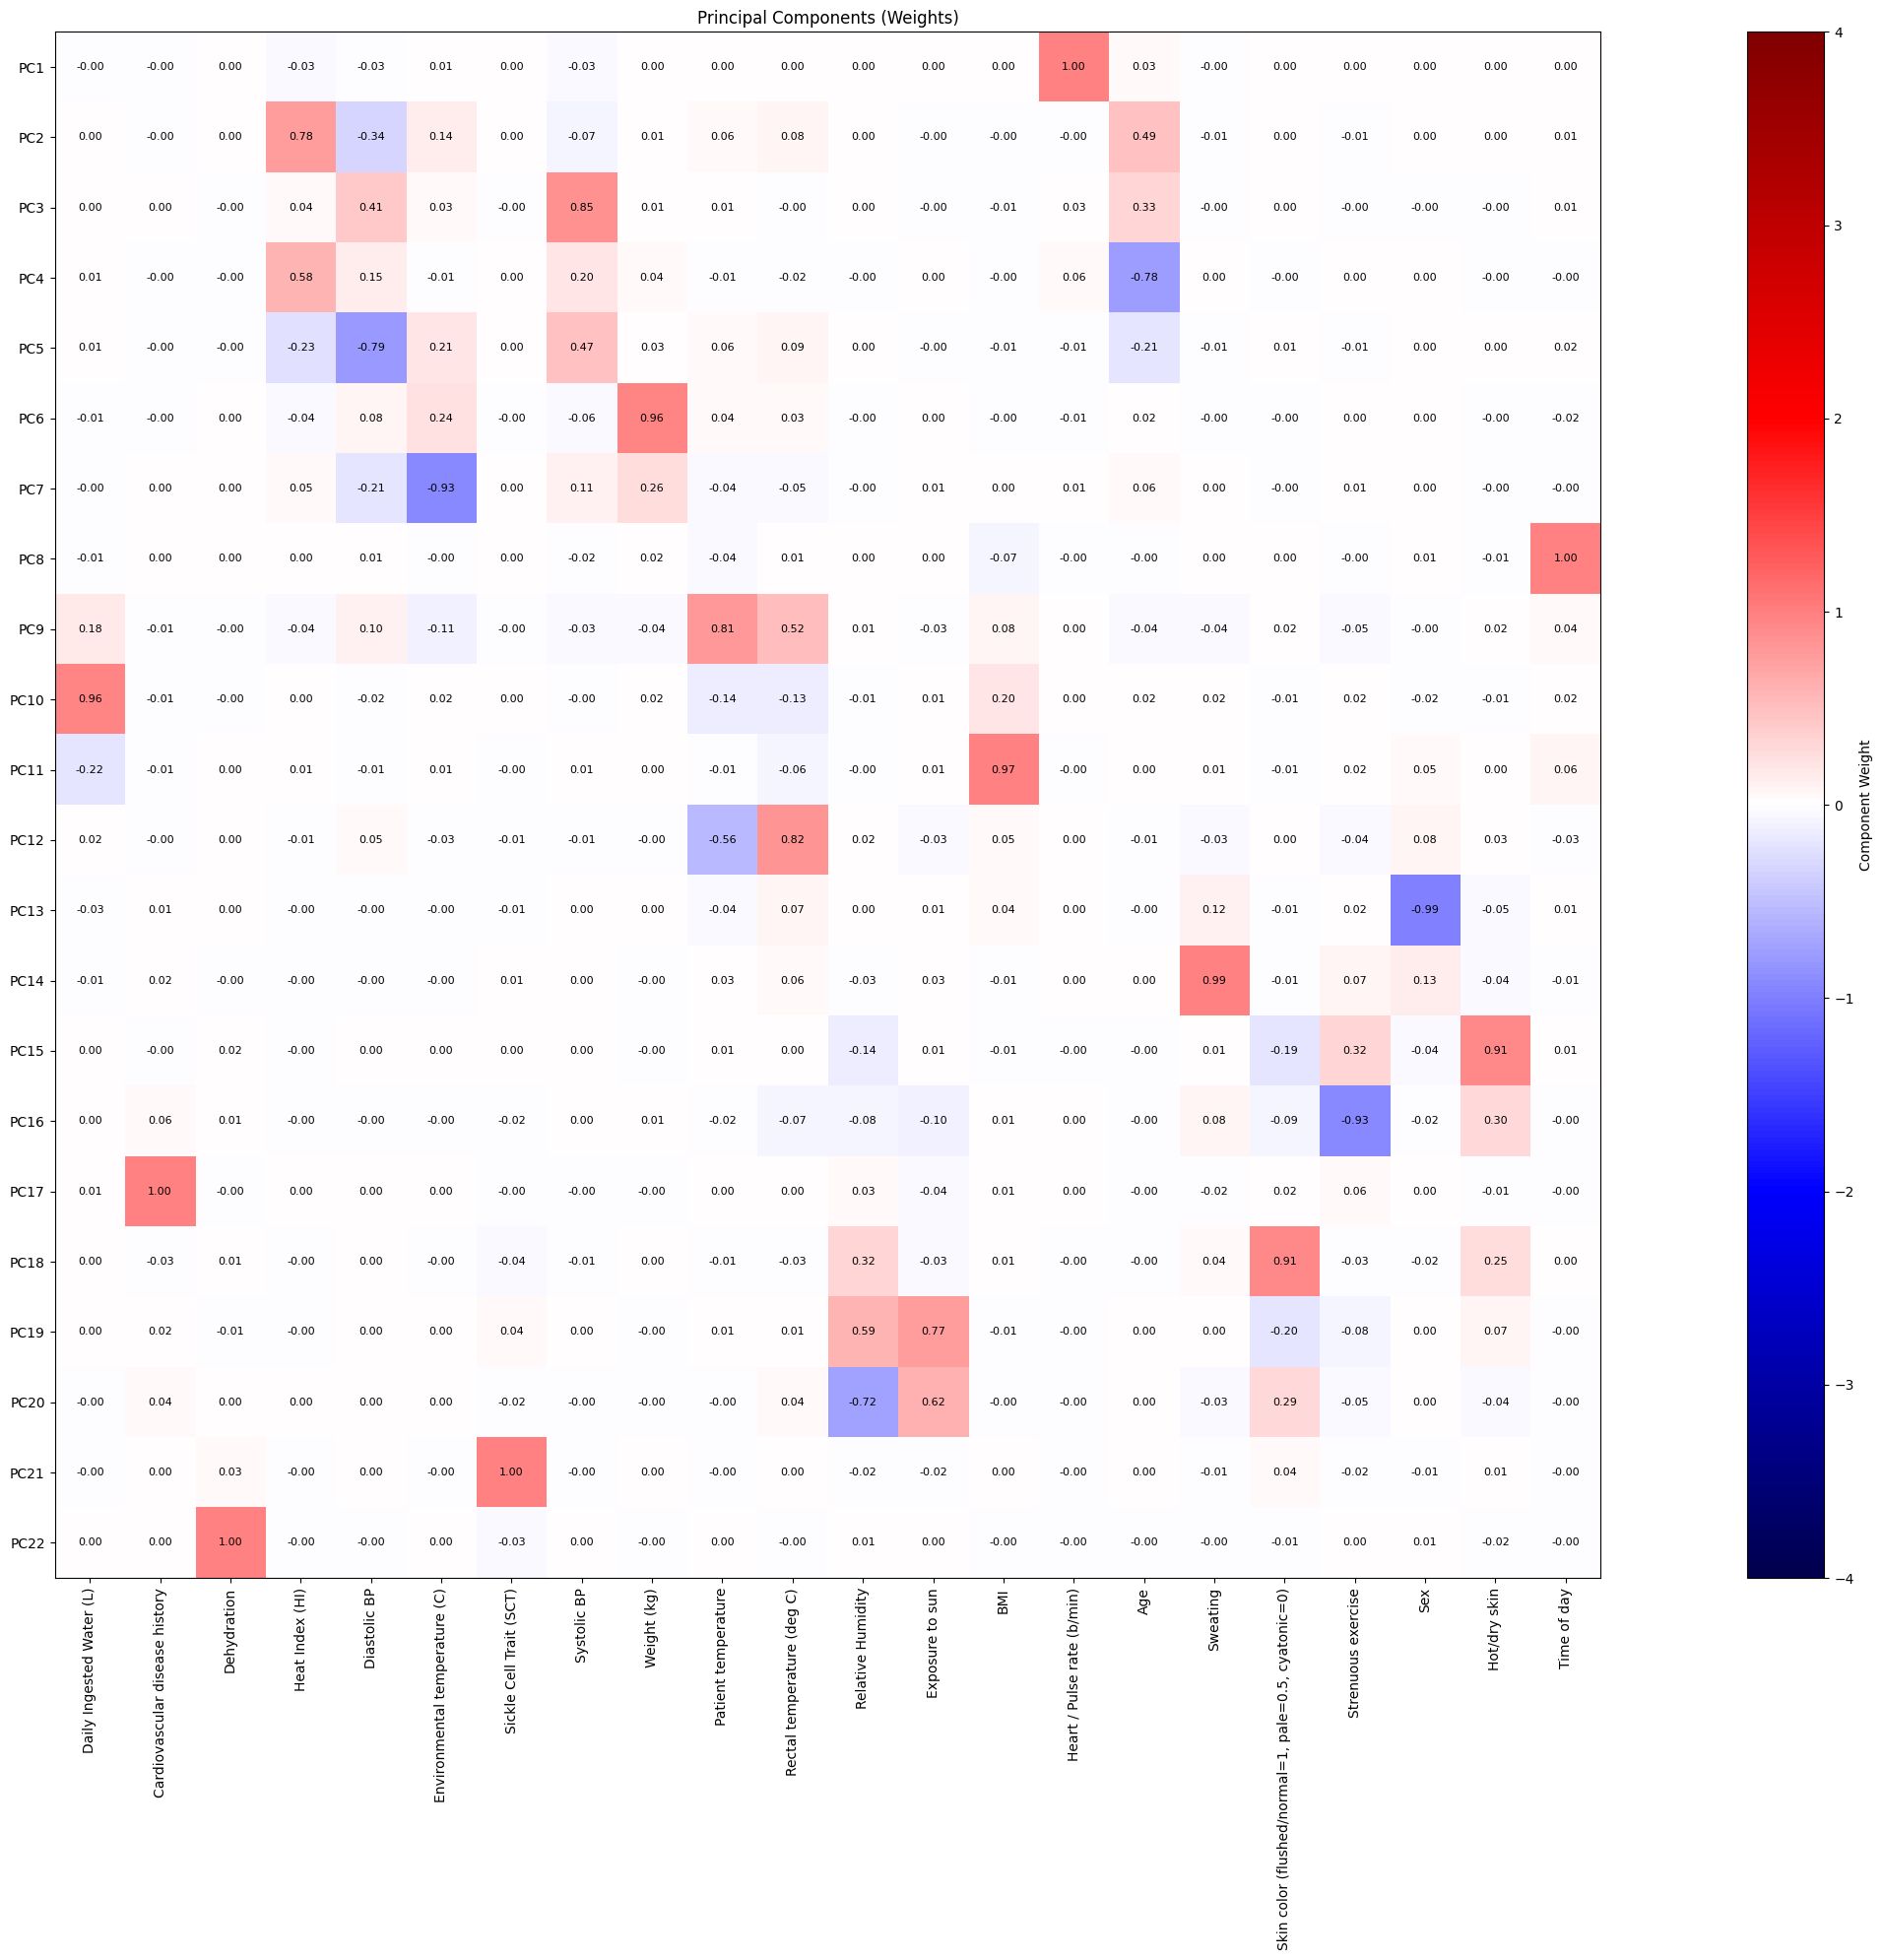

In [ ]:
comps = pca.components_

# Create the plot for PCA components
fig, ax = plt.subplots(figsize=(30, 20))

# Plot the PCA components matrix
img_comps = ax.imshow(comps, cmap='seismic', vmin=-4, vmax=4)  # Adjust vmin and vmax if needed
plt.colorbar(img_comps, ax=ax, label='Component Weight')

# Set ticks and labels
ax.set_yticks(range(comps.shape[0]))
ax.set_yticklabels(["PC{}".format(i+1) for i in range(comps.shape[0])])
ax.set_xticks(range(len(New_data.columns)))
ax.set_xticklabels(New_data.columns, rotation=90)

# Annotate the heatmap with component weights
for x in range(comps.shape[1]):
    for y in range(comps.shape[0]):
        ax.text(x, y, "{:.2f}".format(comps[y, x]), ha='center', va='center', color='black', fontsize=8)

plt.title('Principal Components (Weights)')
plt.tight_layout()
plt.show()

Heatmap before normalization

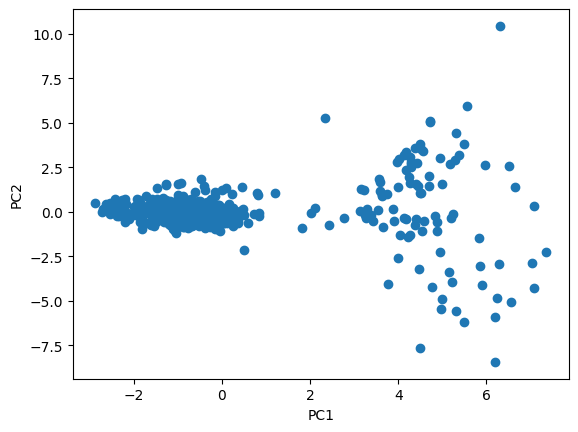

In [ ]:
#normalize and perform PCA

from sklearn import preprocessing as pp

# Step 1: Normalize the data
ss = pp.StandardScaler()
df_normalized = ss.fit_transform(New_data.values)  # Normalize the data

# Step 2: Perform PCA on the normalized data
pca1 = PCA(n_components=22)
pca_norm = pca1.fit_transform(df_normalized)  # Fit and transform in one step

# Step 3: Plotting the first two principal components
ax = plt.gca()
ax.scatter(pca_norm[:, 0], pca_norm[:, 1])
ax.set_xlabel('PC1')  # Set label for PC1
ax.set_ylabel('PC2')  # Set label for PC2

plt.show()

In [ ]:
target1=df_new['Heat stroke']
# Create a DataFrame from the normalized features
X_normalized_df = pd.DataFrame(df_normalized, columns=New_data.columns)

# Add the target column back to the DataFrame
normalized_data = pd.concat([X_normalized_df, target1.reset_index(drop=True)], axis=1)

# Display the first few rows of the normalized dataset
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
   Daily Ingested Water (L)  Cardiovascular disease history  Dehydration  \
0                 -0.489594                       -0.224772    -0.040757   
1                  1.024415                       -0.224772    -0.040757   
2                  1.024415                       -0.224772    -0.040757   
3                  4.846947                       -0.224772    -0.040757   
4                  1.024415                       -0.224772    -0.040757   

   Heat Index (HI)  Diastolic BP  Environmental temperature (C)  \
0         1.416764     -5.815990                       1.377560   
1         1.300493      0.745780                       1.148134   
2         1.079357     -3.003803                       1.148134   
3         0.715826     -0.379095                       1.148134   
4         1.070109      0.558301                       1.148134   

   Sickle Cell Trait (SCT)  Systolic BP  Weight (kg)  Patient temperature  \
0                -0.057687    -4.152690     0.

In [ ]:
pca1.explained_variance_ratio_

array([0.21543924, 0.08239334, 0.05526207, 0.05220593, 0.05193884,
       0.04965285, 0.04713822, 0.0469865 , 0.04339596, 0.04282752,
       0.04072461, 0.04052424, 0.03530627, 0.03233587, 0.0301423 ,
       0.02825128, 0.02547227, 0.0240641 , 0.02008311, 0.01741261,
       0.01160254, 0.00684031])

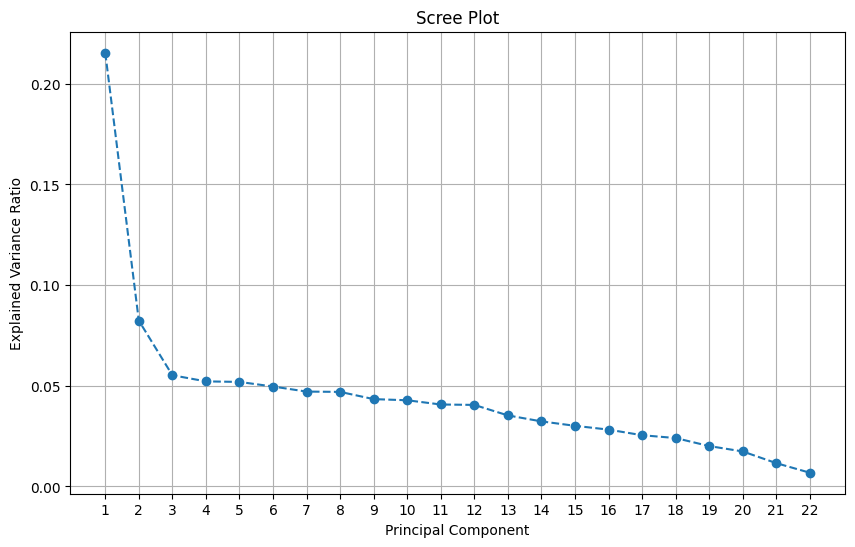

In [ ]:
#Scree Plot

# Step 1: Get the explained variance ratio
explained_variance_ratio = pca1.explained_variance_ratio_

# Step 2: Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')

# Step 3: Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Set x-ticks to match the number of components
plt.grid()

# Optional: Cumulative explained variance plot
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
#plt.title('Cumulative Explained Variance')
#plt.xlabel('Principal Component')
#plt.ylabel('Cumulative Explained Variance')
#plt.xticks(range(1, len(explained_variance_ratio) + 1))
#plt.grid()

plt.show()

In [ ]:
import numpy as np

# Assuming 'pca1' is your PCA object after fitting to the normalized data
explained_variance_ratio = pca1.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance
print("Cumulative Explained Variance:")
for i, cumulative_variance in enumerate(cumulative_explained_variance):
    print(f"PC{i+1}: {cumulative_variance:.4f}")

# Determine the number of components needed for 80% and 90% variance
threshold_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
threshold_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"\nNumber of components to reach 80% variance: {threshold_80}")
print(f"Number of components to reach 90% variance: {threshold_90}")

Cumulative Explained Variance:
PC1: 0.2154
PC2: 0.2978
PC3: 0.3531
PC4: 0.4053
PC5: 0.4572
PC6: 0.5069
PC7: 0.5540
PC8: 0.6010
PC9: 0.6444
PC10: 0.6872
PC11: 0.7280
PC12: 0.7685
PC13: 0.8038
PC14: 0.8361
PC15: 0.8663
PC16: 0.8945
PC17: 0.9200
PC18: 0.9441
PC19: 0.9641
PC20: 0.9816
PC21: 0.9932
PC22: 1.0000

Number of components to reach 80% variance: 13
Number of components to reach 90% variance: 17


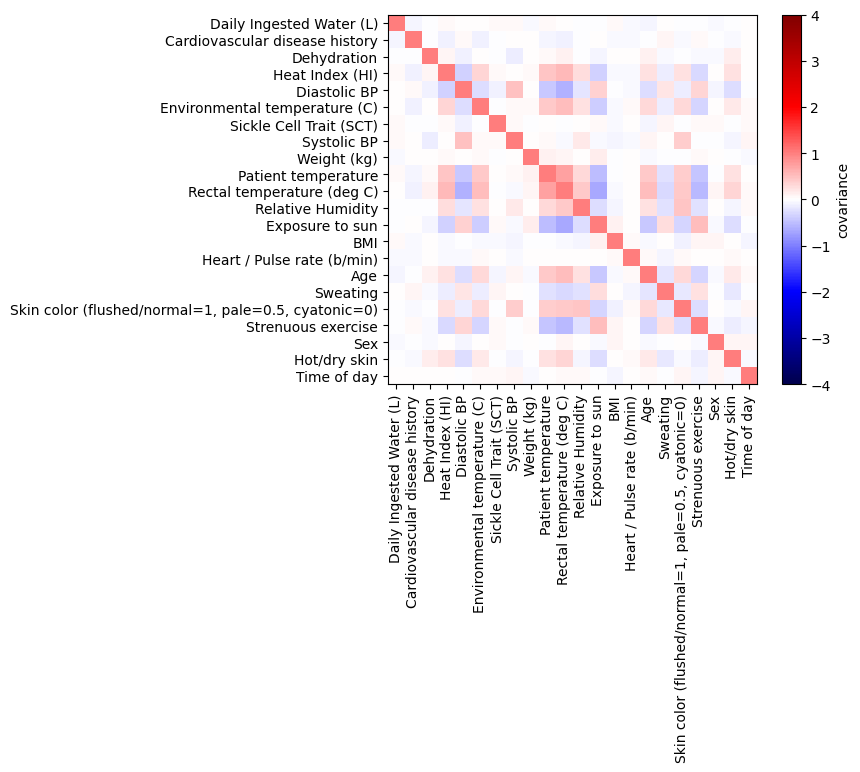

In [ ]:
ax = plt.gca()
covmat = pca1.get_covariance()

img = ax.imshow(covmat, cmap='seismic', vmin=-4, vmax=4)
plt.colorbar(img, label='covariance')

ax.set_yticks(range(len(New_data.columns)))
t = ax.set_yticklabels(New_data.columns)
ax.set_xticks(range(len(New_data.columns)))
t = ax.set_xticklabels(New_data.columns, rotation=90)

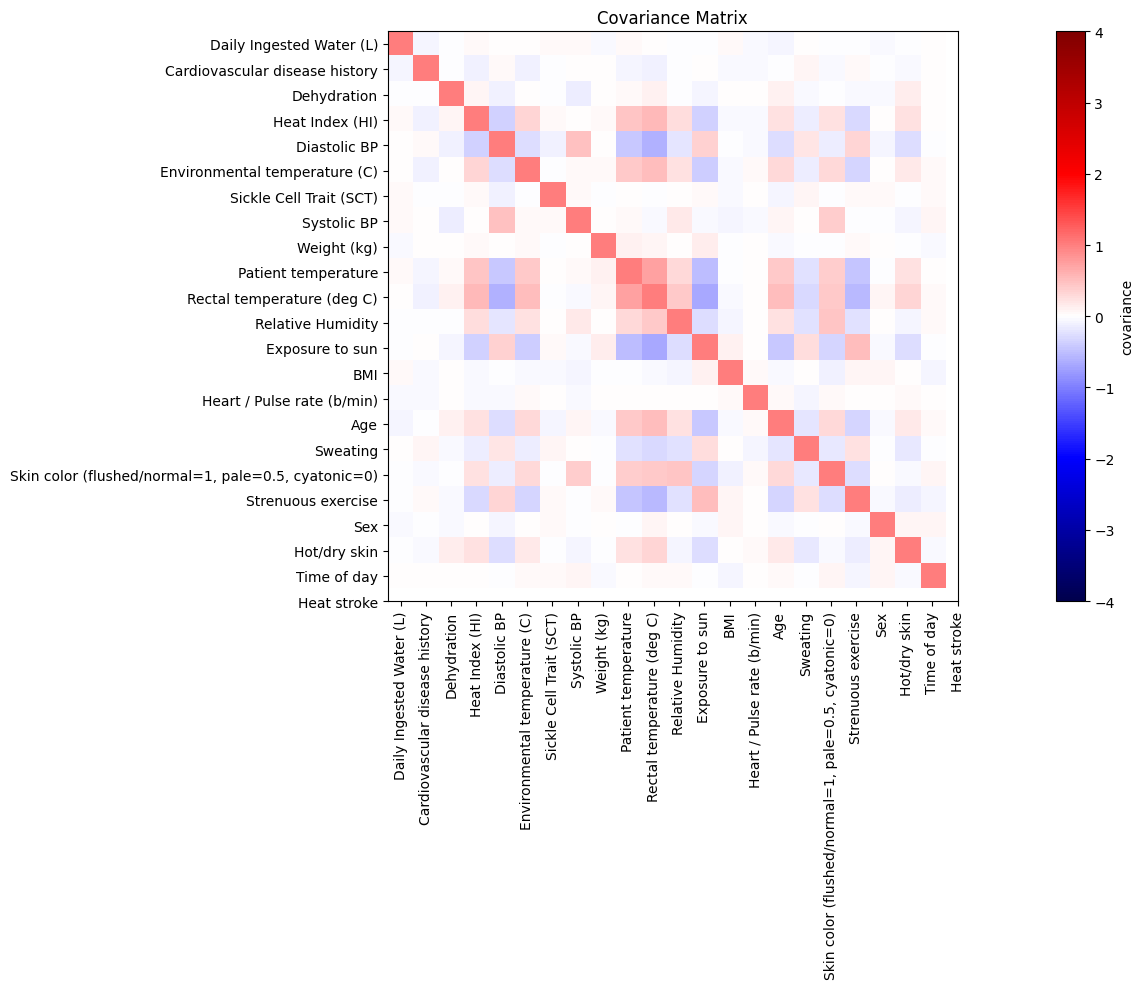

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis with the specified figure size
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed

# Get the covariance matrix from the PCA object
covmat = pca1.get_covariance()

# Plot the covariance matrix
img = ax.imshow(covmat, cmap='seismic', vmin=-4, vmax=4)
plt.colorbar(img, ax=ax, label='covariance')

# Set the tick labels and their positions
ax.set_yticks(range(len(normalized_data.columns)))
ax.set_yticklabels(normalized_data.columns)
ax.set_xticks(range(len(normalized_data.columns)))
ax.set_xticklabels(normalized_data.columns, rotation=90)

plt.title('Covariance Matrix')
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()


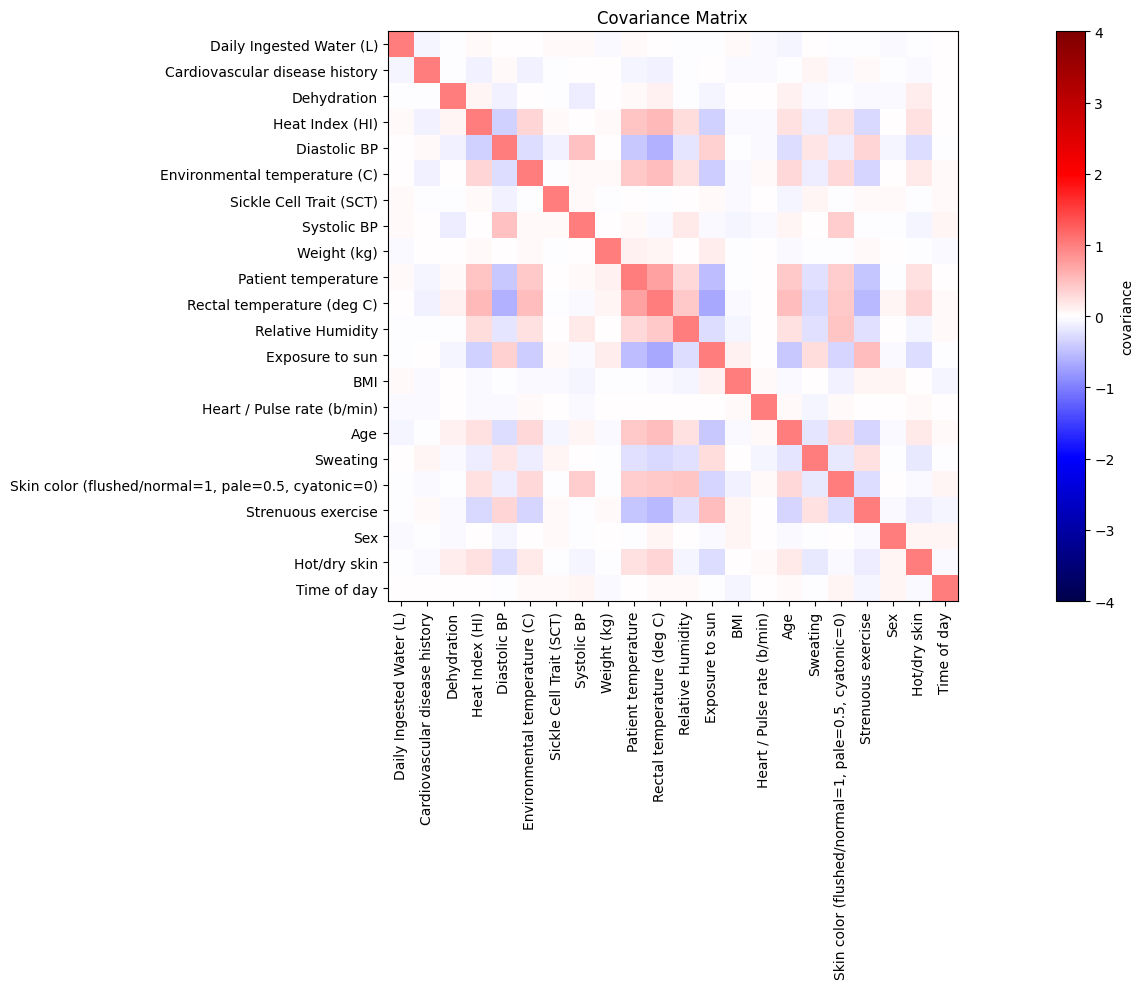

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis with the specified figure size
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed

# Get the covariance matrix from the PCA object
covmat = pca1.get_covariance()

# Plot the covariance matrix
img = ax.imshow(covmat, cmap='seismic', vmin=-4, vmax=4)
plt.colorbar(img, ax=ax, label='covariance')

# Set the tick labels and their positions
ax.set_yticks(range(len(New_data.columns)))
ax.set_yticklabels(New_data.columns)
ax.set_xticks(range(len(New_data.columns)))
ax.set_xticklabels(New_data.columns, rotation=90)

plt.title('Covariance Matrix')
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()


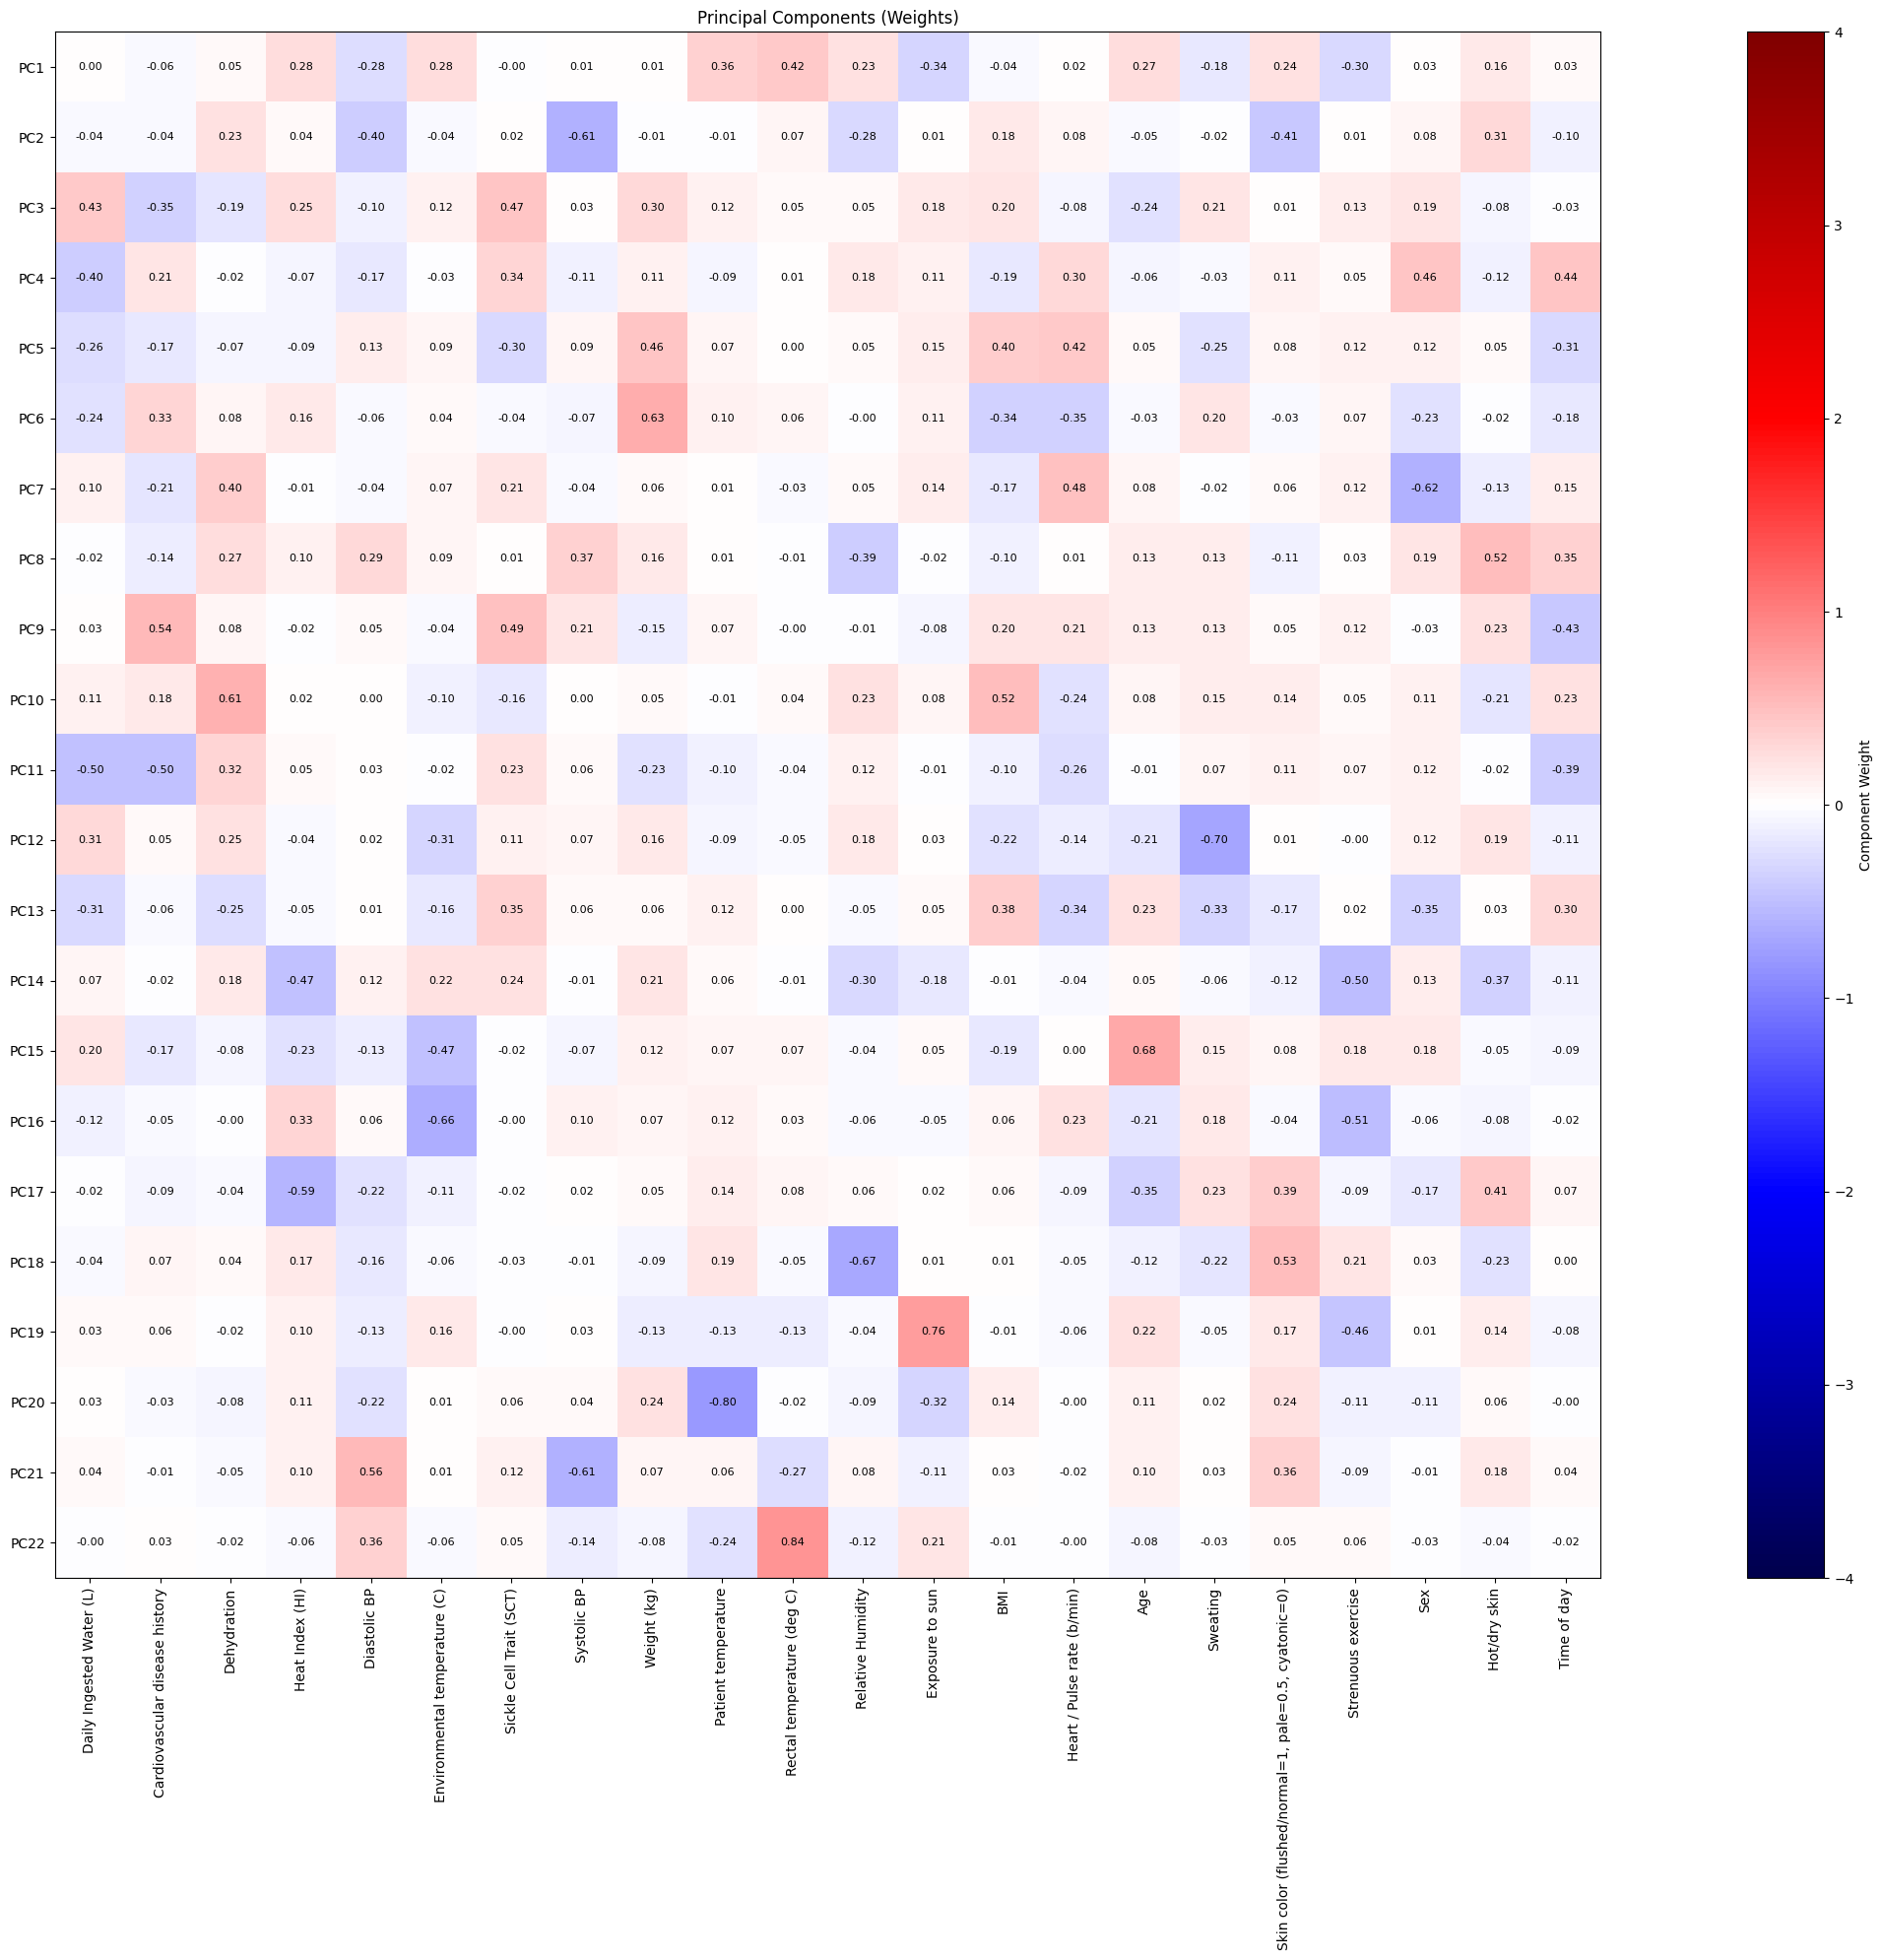

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# pca1 is PCA object and df_new is DataFrame

# Get the PCA components
comps = pca1.components_

# Create the plot for PCA components
fig, ax = plt.subplots(figsize=(30, 20))

# Plot the PCA components matrix
img_comps = ax.imshow(comps, cmap='seismic', vmin=-4, vmax=4)  # Adjust vmin and vmax if needed
plt.colorbar(img_comps, ax=ax, label='Component Weight')

# Set ticks and labels
ax.set_yticks(range(comps.shape[0]))
ax.set_yticklabels(["PC{}".format(i+1) for i in range(comps.shape[0])])
ax.set_xticks(range(len(New_data.columns)))
ax.set_xticklabels(New_data.columns, rotation=90)

# Annotate the heatmap with component weights
for x in range(comps.shape[1]):
    for y in range(comps.shape[0]):
        ax.text(x, y, "{:.2f}".format(comps[y, x]), ha='center', va='center', color='black', fontsize=8)

plt.title('Principal Components (Weights)')
plt.tight_layout()
plt.show()


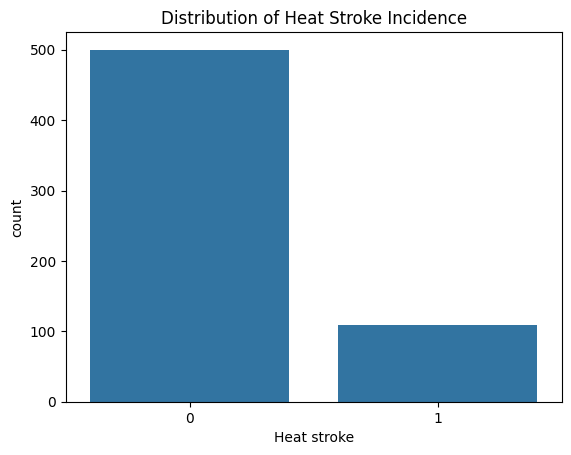

In [ ]:
#Just keep this code
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='Heat stroke', data=df)
plt.title('Distribution of Heat Stroke Incidence')
plt.show()

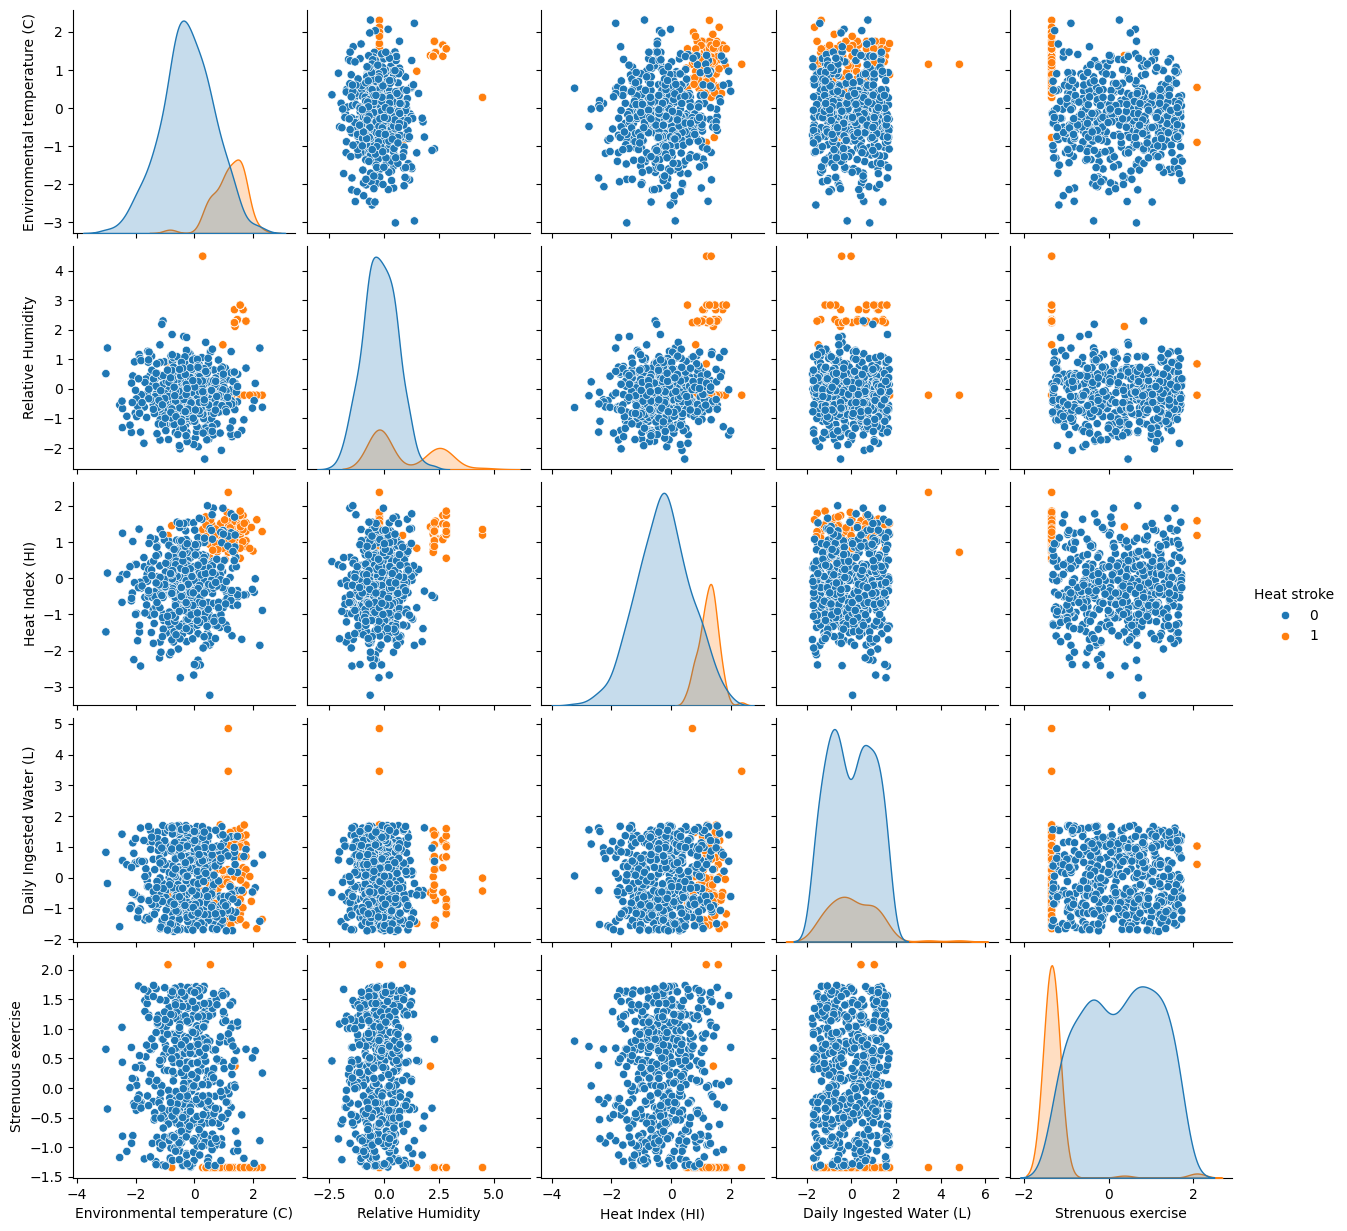

In [ ]:
# Pairplot for selected variables
sns.pairplot(normalized_data, hue='Heat stroke', vars=['Environmental temperature (C)', 'Relative Humidity', 'Heat Index (HI)', 'Daily Ingested Water (L)', 'Strenuous exercise'])
plt.show()


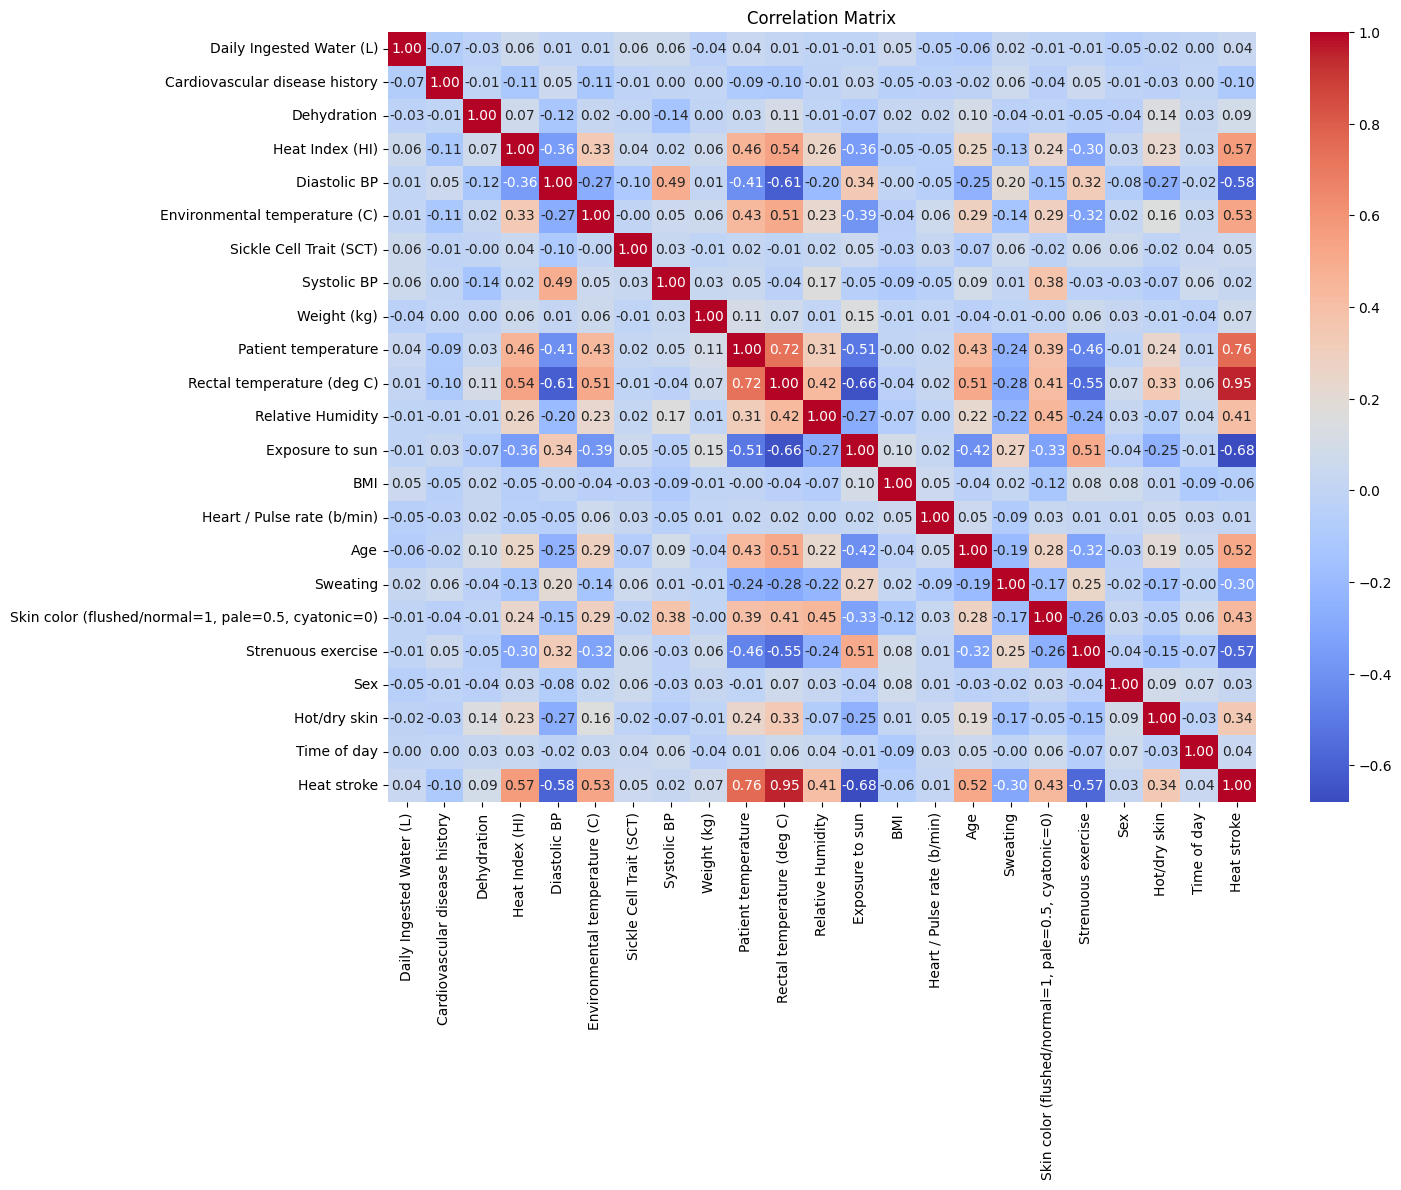

In [ ]:
# Correlation matrix
corr_matrix = normalized_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)


Index([], dtype='object')


### Spliting the data

In [ ]:
#Divide the data into trian and test

target = df_new['Heat stroke']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (df_normalized, target, test_size=0.3, random_state=421, shuffle=True)

In [ ]:
x_train.shape

(422, 22)

In [ ]:
y_train.shape

(422,)

In [ ]:
x_test.shape

(181, 22)

In [ ]:
y_test.shape

(181,)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# View the model coefficients
coefficients = pd.DataFrame({
    'Feature': New_data.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

Accuracy: 0.99
Confusion Matrix:
[[149   1]
 [  1  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.97      0.97      0.97        31

    accuracy                           0.99       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.99      0.99      0.99       181

                                              Feature  Coefficient
0                            Daily Ingested Water (L)    -0.024009
1                      Cardiovascular disease history    -0.096681
2                                         Dehydration     0.005676
3                                     Heat Index (HI)     0.744268
4                                        Diastolic BP    -0.878916
5                       Environmental temperature (C)     0.684354
6                             Sickle Cell Trait (SCT)     0.481007
7                                         Systolic BP    -

In [ ]:
# Split data into training, testing, and validation sets
x_train1, x_main1, y_train1, y_main1 = train_test_split(df_normalized, target, test_size=0.3, random_state=421)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_main1, y_main1, test_size=0.5, random_state=421)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(x_train1, y_train1)

# Make predictions on the validation set
y_pred_val1 = model.predict(x_val1)

# Evaluate the model on the validation set
accuracy_val1 = accuracy_score(y_val1, y_pred_val1)
print("Validation Accuracy:", accuracy_val1)

# If satisfied with the validation performance, evaluate on the test set
y_pred_test1 = model.predict(x_test1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print("Test Accuracy:", accuracy_test1)


Validation Accuracy: 0.9888888888888889
Test Accuracy: 0.989010989010989


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.99
Confusion Matrix:
[[149   1]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.97      1.00      0.98        31

    accuracy                           0.99       181
   macro avg       0.98      1.00      0.99       181
weighted avg       0.99      0.99      0.99       181



### Random Forest

Accuracy: 1.00
Confusion Matrix:
[[150   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181

Feature Importances:
                                              Feature  Importance
10                         Rectal temperature (deg C)    0.267389
12                                    Exposure to sun    0.177245
18                                 Strenuous exercise    0.131324
9                                 Patient temperature    0.127737
4                                        Diastolic BP    0.119674
15                                                Age    0.052999
7                                         Systolic BP    0.037869
3                                     Heat In

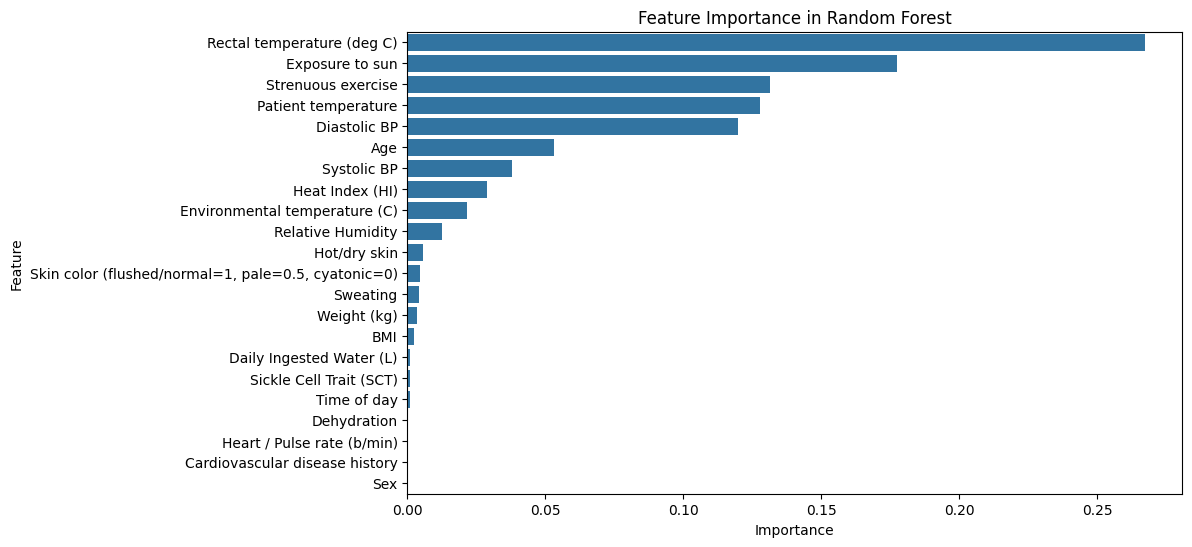

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': New_data.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.show()


### K-nearest neighbours

In [ ]:
#pip install --upgrade numpy scipy scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the KNN model
k = 5  # Number of neighbors to consider
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[150   0]
 [  3  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.90      0.95        31

    accuracy                           0.98       181
   macro avg       0.99      0.95      0.97       181
weighted avg       0.98      0.98      0.98       181



Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181

Confusion Matrix:
[[150   0]
 [  0  31]]


SVM

In [ ]:
#Kernal=linear
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='linear', C=100)

# Train the model
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.97      0.97      0.97        31

    accuracy                           0.99       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.99      0.99      0.99       181

Confusion Matrix:
[[149   1]
 [  1  30]]


In [ ]:
#Kernal=linear
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='linear', C=5)

# Train the model
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')

print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.97      0.97      0.97        31

    accuracy                           0.99       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.99      0.99      0.99       181

Confusion Matrix:
[[149   1]
 [  1  30]]


In [ ]:
#Kernal=linear
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='poly', C=100)

# Train the model
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.97      0.94      0.95        31

    accuracy                           0.98       181
   macro avg       0.98      0.96      0.97       181
weighted avg       0.98      0.98      0.98       181

Confusion Matrix:
[[149   1]
 [  2  29]]


In [ ]:
#Kernal=linear
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='rbf', C=75)

# Train the model
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.97      1.00      0.98        31

    accuracy                           0.99       181
   macro avg       0.98      1.00      0.99       181
weighted avg       0.99      0.99      0.99       181

Confusion Matrix:
[[149   1]
 [  0  31]]


In [ ]:
#Kernal=linear
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='sigmoid', C=100)

# Train the model
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       1.00      0.94      0.97        31

    accuracy                           0.99       181
   macro avg       0.99      0.97      0.98       181
weighted avg       0.99      0.99      0.99       181

Confusion Matrix:
[[150   0]
 [  2  29]]


XGBoost

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Logarithmic loss function
    use_label_encoder=False,      # To avoid warnings about label encoder
    n_estimators=100,             # Number of trees
    max_depth=3,                  # Maximum depth of trees
    learning_rate=0.1             # Learning rate
)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:19:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Neural networks: MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#activation functions: identity, tanh, or logistic, relu
# Create and train the MLP model
#mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,10),
                      activation='relu',
                      learning_rate='constant',
                      solver='lbfgs')

mlp.fit(x_train, y_train)

# Make predictions
y_pred = mlp.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.98
Confusion Matrix:
[[150   0]
 [  1  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       1.00      0.97      0.98        31

    accuracy                           0.99       181
   macro avg       1.00      0.98      0.99       181
weighted avg       0.99      0.99      0.99       181



Gradient Boosted Trees: XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[150   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AdaBoost

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Printing classification report
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[150   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier
model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[150   0]
 [  0  31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        31

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



Using cross validation to access the methods since many parameters I got as 1

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Define the cross-validation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, New_data, target, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
cv_results = -cv_results

# Print the cross-validation results
print(f"Mean Squared Error for each fold: {cv_results}")
print(f"Mean Squared Error: {cv_results.mean():.2f}")
print(f"Standard Deviation of MSE: {cv_results.std():.2f}")

Mean Squared Error for each fold: [0.00953631 0.0241059  0.01303263 0.01070408 0.01651636 0.01834986
 0.00336961 0.00781039 0.01229372 0.0117679 ]
Mean Squared Error: 0.01
Standard Deviation of MSE: 0.01
